In [2]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19041)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_3.6.1  IRdisplay_0.7.0 pbdZMQ_0.3-4    tools_3.6.1    
 [5] htmltools_0.4.0 pillar_1.4.4    base64enc_0.1-3 crayon_1.3.4   
 [9] Rcpp_1.0.4.6    uuid_0.1-4      IRkernel_1.1.1  jsonlite_1.6.1 
[13] digest_0.6.25   repr_1.1.0      rlang_0.4.6     evaluate_0.14  

In [3]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [7]:
library(tidytext)

Warning message:
"package 'tidytext' was built under R version 3.6.3"


In [8]:
text <- c("Because I could not stop for Death -",
          "He kindly stopped for me -",
          "The Carriage held but just Ourselves -",
          "and Immortality")

text

[1] "Because I could not stop for Death -"  
[2] "He kindly stopped for me -"            
[3] "The Carriage held but just Ourselves -"
[4] "and Immortality"

In [9]:
text_df <- tibble(line=1:4, text = text)
text_df

line,text
<int>,<chr>
1,Because I could not stop for Death -
2,He kindly stopped for me -
3,The Carriage held but just Ourselves -
4,and Immortality


In [12]:
# lowercase conversion is the default behavior for unnest_tokens
text_df %>% 
    unnest_tokens(word, text,to_lower = TRUE)

line,word
<int>,<chr>
1,because
1,i
1,could
1,not
1,stop
1,for
1,death
2,he
2,kindly


In [13]:
library(janeaustenr)

Warning message:
"package 'janeaustenr' was built under R version 3.6.3"


In [14]:
library(stringr)

Warning message:
"package 'stringr' was built under R version 3.6.3"


In [16]:
original_books <- austen_books()

In [17]:
str(original_books)

tibble [73,422 x 2] (S3: tbl_df/tbl/data.frame)
 $ text: chr [1:73422] "SENSE AND SENSIBILITY" "" "by Jane Austen" "" ...
 $ book: Factor w/ 6 levels "Sense & Sensibility",..: 1 1 1 1 1 1 1 1 1 1 ...


In [18]:
head(original_books)

text,book
<chr>,<fct>
SENSE AND SENSIBILITY,Sense & Sensibility
,Sense & Sensibility
by Jane Austen,Sense & Sensibility
,Sense & Sensibility
(1811),Sense & Sensibility
,Sense & Sensibility


In [19]:
original_books <- austen_books() %>%
        group_by(book) %>%
        mutate(linenumber = row_number(),
              chapter = cumsum(str_detect(text,
                                         regex("^chapter [\\divxlc]",
                                              ignore_case = TRUE)))) %>%
        ungroup()

In [20]:
original_books

text,book,linenumber,chapter
<chr>,<fct>,<int>,<int>
SENSE AND SENSIBILITY,Sense & Sensibility,1,0
,Sense & Sensibility,2,0
by Jane Austen,Sense & Sensibility,3,0
,Sense & Sensibility,4,0
(1811),Sense & Sensibility,5,0
,Sense & Sensibility,6,0
,Sense & Sensibility,7,0
,Sense & Sensibility,8,0
,Sense & Sensibility,9,0


In [21]:
tidy_books <- original_books %>% 
                unnest_tokens(word, text)
tidy_books

book,linenumber,chapter,word
<fct>,<int>,<int>,<chr>
Sense & Sensibility,1,0,sense
Sense & Sensibility,1,0,and
Sense & Sensibility,1,0,sensibility
Sense & Sensibility,3,0,by
Sense & Sensibility,3,0,jane
Sense & Sensibility,3,0,austen
Sense & Sensibility,5,0,1811
Sense & Sensibility,10,1,chapter
Sense & Sensibility,10,1,1


In [22]:
data(stop_words)

In [24]:
tidy_books <- tidy_books %>% 
            anti_join(stop_words)

Joining, by = "word"



In [25]:
tidy_books

book,linenumber,chapter,word
<fct>,<int>,<int>,<chr>
Sense & Sensibility,1,0,sense
Sense & Sensibility,1,0,sensibility
Sense & Sensibility,3,0,jane
Sense & Sensibility,3,0,austen
Sense & Sensibility,5,0,1811
Sense & Sensibility,10,1,chapter
Sense & Sensibility,10,1,1
Sense & Sensibility,13,1,family
Sense & Sensibility,13,1,dashwood


Removing stopwords reduced the rows from 725,055 to 217,609

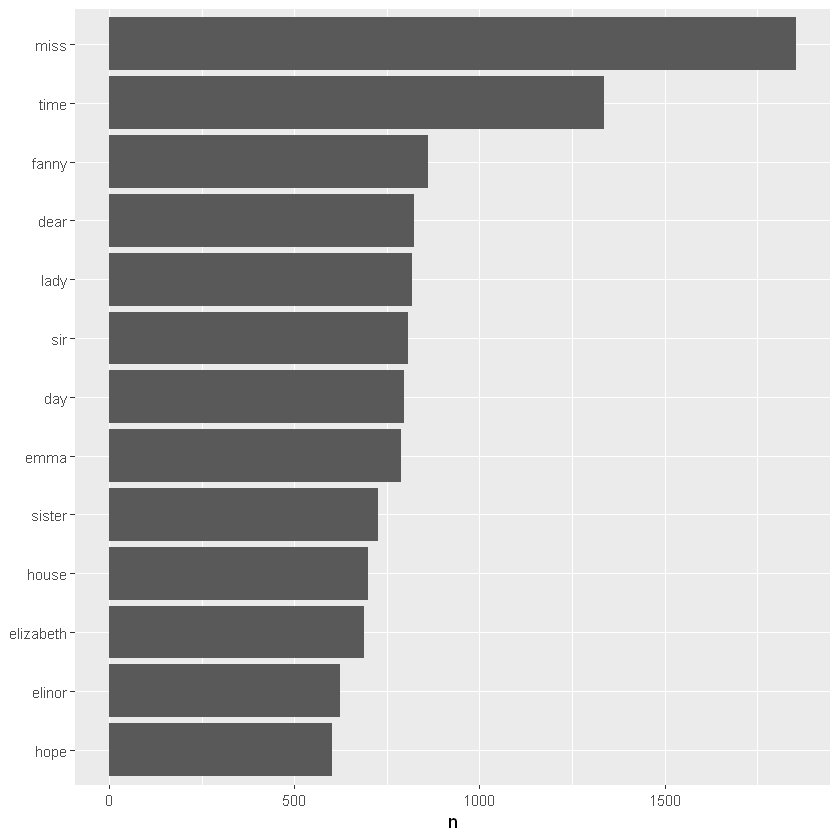

In [28]:
library(ggplot2)
tidy_books %>%
  count(word, sort = TRUE) %>%
    filter(n > 600) %>%
    mutate(word = reorder(word, n)) %>%
ggplot(aes(n, word)) +
geom_col() + 
labs(y=NULL)

In [31]:
#install.packages("gutenbergr")
library(gutenbergr)

Warning message:
"package 'gutenbergr' was built under R version 3.6.3"


In [40]:
gw  <- gutenberg_works()
gw[gw$gutenberg_id %in% c(35, 36, 5230, 159),]

gutenberg_id,title,author,gutenberg_author_id,language,gutenberg_bookshelf,rights,has_text
<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<lgl>
35,The Time Machine,"Wells, H. G. (Herbert George)",30,en,Science Fiction/Movie Books,Public domain in the USA.,TRUE
36,The War of the Worlds,"Wells, H. G. (Herbert George)",30,en,Movie Books/Science Fiction,Public domain in the USA.,TRUE
159,The Island of Doctor Moreau,"Wells, H. G. (Herbert George)",30,en,Best Books Ever Listings/Science Fiction/Movie Books,Public domain in the USA.,TRUE
5230,The Invisible Man: A Grotesque Romance,"Wells, H. G. (Herbert George)",30,en,Movie Books,Public domain in the USA.,TRUE


In [32]:
hgwells <- gutenberg_download(c(35, 36, 5230, 159))

Determining mirror for Project Gutenberg from http://www.gutenberg.org/robot/harvest

Using mirror http://aleph.gutenberg.org



In [41]:
head(hgwells)

gutenberg_id,text
<int>,<chr>
35,The Time Machine
35,
35,An Invention
35,
35,by H. G. Wells
35,


In [44]:
tidy_hgwells <- hgwells %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words)
tidy_hgwells

Joining, by = "word"



gutenberg_id,word
<int>,<chr>
35,time
35,machine
35,invention
35,contents
35,introduction
35,ii
35,machine
35,iii
35,time


In [43]:
tidy_hgwells %>%
  count(word, sort = TRUE)

word,n
<chr>,<int>
time,461
people,302
door,260
heard,249
black,232
stood,229
white,224
hand,218
kemp,213


In [45]:
bronte <- gutenberg_download(c(1260, 768, 969, 9182, 767))

In [46]:
tidy_bronte <- bronte %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words)

Joining, by = "word"



In [47]:
library(tidyr)

frequency <- bind_rows(mutate(tidy_bronte, author = "Brontë Sisters"),
                       mutate(tidy_hgwells, author = "H.G. Wells"), 
                       mutate(tidy_books, author = "Jane Austen")) %>% 
  mutate(word = str_extract(word, "[a-z']+")) %>%
  count(author, word) %>%
  group_by(author) %>%
  mutate(proportion = n / sum(n)) %>% 
  select(-n) %>% 
  spread(author, proportion) %>% 
  gather(author, proportion, `Brontë Sisters`:`H.G. Wells`)

Warning message:
"package 'tidyr' was built under R version 3.6.3"


In [48]:
frequency

word,Jane Austen,author,proportion
<chr>,<dbl>,<chr>,<dbl>
a,9.190796e-06,Brontë Sisters,5.870979e-05
a'n't,4.595398e-06,Brontë Sisters,NA
aback,NA,Brontë Sisters,3.913986e-06
abaht,NA,Brontë Sisters,3.913986e-06
abandon,NA,Brontë Sisters,3.131189e-05
abandoned,4.595398e-06,Brontë Sisters,9.002168e-05
abandoning,NA,Brontë Sisters,3.913986e-06
abandonment,NA,Brontë Sisters,1.956993e-05
abart,NA,Brontë Sisters,NA


Warning message:
"Removed 40857 rows containing missing values (geom_point)."
Warning message:
"Removed 40859 rows containing missing values (geom_text)."


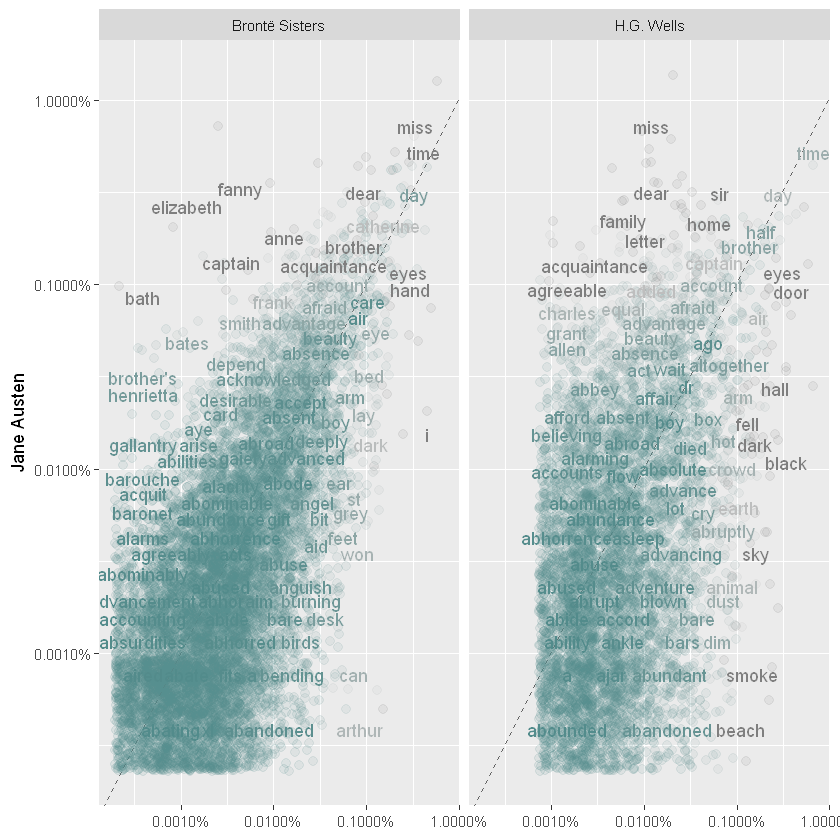

In [50]:
library(scales)

# expect a warning about rows with missing values being removed
ggplot(frequency, aes(x = proportion, y = `Jane Austen`, 
                      color = abs(`Jane Austen` - proportion))) +
  geom_abline(color = "gray40", lty = 2) +
  geom_jitter(alpha = 0.1, size = 2.5, width = 0.3, height = 0.3) +
  geom_text(aes(label = word), check_overlap = TRUE, vjust = 1.5) +
  scale_x_log10(labels = percent_format()) +
  scale_y_log10(labels = percent_format()) +
  scale_color_gradient(limits = c(0, 0.001), 
                       low = "darkslategray4", high = "gray75") +
  facet_wrap(~author, ncol = 2) +
  theme(legend.position="none") +
  labs(y = "Jane Austen", x = NULL)

In [51]:
book_words <- austen_books() %>%
  unnest_tokens(word, text) %>%
  count(book, word, sort = TRUE)

In [57]:
book_tf_idf  <- book_words %>%
    mutate(word = str_trim(word)) %>%
    bind_tf_idf(word, book, n) %>%
    arrange(desc(tf_idf))

In [73]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [58]:
library(forcats)

book_tf_idf %>%
  group_by(book) %>%
  slice_max(tf_idf, n = 15) %>%
  ungroup() %>%
  ggplot(aes(tf_idf, fct_reorder(word, tf_idf), fill = book)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~book, ncol = 2, scales = "free") +
  labs(x = "tf-idf", y = NULL)

Warning message:
"package 'forcats' was built under R version 3.6.3"


ERROR: Error in slice_max(., tf_idf, n = 15): could not find function "slice_max"


In [74]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19041)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] dplyr_0.8.5       forcats_0.5.0     scales_1.1.1      tidyr_1.0.3      
[5] gutenbergr_0.2.0  ggplot2_3.3.0     stringr_1.4.0     janeaustenr_0.1.5
[9] tidytext_0.2.6   

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.4.6     pillar_1.4.4     compiler_3.6.1   base64enc_0.1-3 
 [5] tokenizers_0.2.1 tools_3.6.1      digest_0.6.25    uuid_0.1-4      
 [9] gtable_0.3.0     jsonlite_1.6.1   evaluate_0.14    lifecycle_0.2.0 
[13] tibble_3.0.1     lattice_0.20-38  pkgconfig_2.0.3  rlang_0.4.6     
